# Effect of Batch size on Training loss and Accuracy
# I have tried the Batch Sizes as 1,32 and 64

In [1]:
# Importing the Data Set and Preprocessing it
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
os.chdir(r'D:\HackerEarth Comp-2\Dataset')
train_df=pd.read_csv("train.csv")
train_df.drop(['id'],axis=1,inplace=True)
df=train_df.drop(['netgain'],axis=1)
y=train_df[['netgain']]
# Data Preprocessing
#
def labelencoding(feature):             # Function to label the Categorical data
    l=len(df[feature].value_counts())
    name=df[feature].unique()
    for i in range(l):
        df[feature].replace({name[i]:i},inplace=True)
df_relationship_status=pd.get_dummies(df['realtionship_status'])
df_relationship_status.drop(['Widowed'],axis=1,inplace=True)

df_industry=pd.get_dummies(df['industry'])
df_industry.drop(['Political'],axis=1,inplace=True)

df_genre=pd.get_dummies(df['genre'])
df_genre.drop(['Other'],axis=1,inplace=True)

df_targeted_sex=pd.get_dummies(df['targeted_sex'])
df_targeted_sex.drop(['Male'],axis=1,inplace=True)

df_airtime=pd.get_dummies(df['airtime'])
df_airtime.drop(['Primetime'],axis=1,inplace=True)

df_airlocation=pd.get_dummies(df['airlocation'])
df_airlocation.drop(['Yugoslavia'],axis=1,inplace=True)



df_money_back_guarantee	=pd.get_dummies(df['money_back_guarantee'])
df_money_back_guarantee.drop(['Yes'],axis=1,inplace=True)

X=pd.concat([df,df_airlocation,df_airtime,df_genre,df_industry,df_money_back_guarantee,df_relationship_status,df_targeted_sex],axis=1)
X.drop(['realtionship_status','industry','genre','targeted_sex','airtime','airlocation','money_back_guarantee'],axis=1,inplace=True)
X['expensive']=X['expensive'].replace({"Low":0,"Medium":1,"High":2})
# Scaling the 'average_runtime(minutes_per_week)', 'ratings'
train=X
train['ratings']=(train['ratings']-train['ratings'].min())/(train['ratings'].max()-train['ratings'].min())
train['average_runtime(minutes_per_week)']=(train['average_runtime(minutes_per_week)']-train['average_runtime(minutes_per_week)'].min())/(train['average_runtime(minutes_per_week)'].max()-train['average_runtime(minutes_per_week)'].min())

y=y.replace({False:0,True:1})

In [6]:
# Training Data set after data Preprocessing
train.head(2)

,average_runtime(minutes_per_week),ratings,expensive,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,...,Other,Pharma,No,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Female
0,0.44898,0.027465,2,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0.44898,0.027465,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0


In [8]:
y.head()

,netgain
0,0
1,0
2,0
3,0
4,1


In [2]:
# Lets split our  data set in test and Train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train,y,test_size=0.01,random_state=12,stratify=y)
print("X_train_shape: "+str(X_train.shape))
print("y_train_shape: "+str(y_train.shape))
print("X_test_shape: "+str(X_test.shape))
print("y_test_shape: "+str(y_test.shape))

X_train_shape: (25787, 63)
y_train_shape: (25787, 1)
X_test_shape: (261, 63)
y_test_shape: (261, 1)


In [3]:
# Current Directory
import os
print(os.getcwd())

D:\HackerEarth Comp-2\Dataset


In [22]:
# First trail
cd=os.getcwd()
# HyperParameters:
#Batch_size=32
#4 Hidden Layers with (264,128,64,32) neurons
#Dropout_Rate: 0.1 applied in three layers
#Learning_rate: 0.001

import tensorflow as tf
from keras.callbacks import ModelCheckpoint
filepath=cd
checkpoint = ModelCheckpoint("weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# Fit the model

import keras
import tensorflow as tf
model=tf.keras.models.Sequential([ 
                                   tf.keras.layers.Dense(63,input_shape=(63,),activation='relu'),
    tf.keras.layers.Dense(264,activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.1),
   tf.keras.layers.Dense(32,activation='relu'),
                                  
                             
                             tf.keras.layers.Dense(2,activation='softmax')
])
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
y_train_=to_categorical(y_train)


model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
history=model.fit(X_train,y_train_,epochs=1000,validation_split=0.1,callbacks=callbacks_list)




Train on 23208 samples, validate on 2579 samples
Epoch 1/1000
23040/23208 [============================>.] - ETA: 0s - loss: 0.4343 - accuracy: 0.7688
Epoch 00001: val_accuracy improved from -inf to 0.78519, saving model to weights-improvement-01-0.79.hdf5
23208/23208 [==============================] - 3s 144us/sample - loss: 0.4341 - accuracy: 0.7689 - val_loss: 0.3967 - val_accuracy: 0.7852
Epoch 2/1000
23072/23208 [============================>.] - ETA: 0s - loss: 0.4012 - accuracy: 0.7922
Epoch 00002: val_accuracy improved from 0.78519 to 0.80729, saving model to weights-improvement-02-0.81.hdf5
23208/23208 [==============================] - 3s 133us/sample - loss: 0.4009 - accuracy: 0.7924 - val_loss: 0.3768 - val_accuracy: 0.8073
Epoch 3/1000
23008/23208 [============================>.] - ETA: 0s - loss: 0.3858 - accuracy: 0.7997
Epoch 00003: val_accuracy did not improve from 0.80729
23208/23208 [==============================] - 3s 131us/sample - loss: 0.3859 - accuracy: 0.7998 

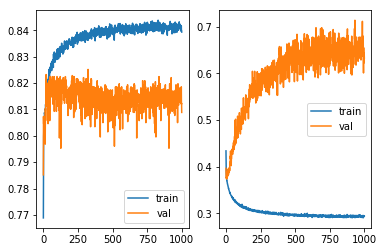

In [25]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','val'])
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','val'])

Using TensorFlow backend.


Train on 23208 samples, validate on 2579 samples
Epoch 1/100
23201/23208 [============================>.] - ETA: 0s - loss: 0.4309 - accuracy: 0.7791
Epoch 00001: val_accuracy improved from -inf to 0.80186, saving model to weights-improvement-01-0.80.hdf5
23208/23208 [==============================] - 74s 3ms/sample - loss: 0.4310 - accuracy: 0.7791 - val_loss: 0.3947 - val_accuracy: 0.8019
Epoch 2/100
23202/23208 [============================>.] - ETA: 0s - loss: 0.4075 - accuracy: 0.7997
Epoch 00002: val_accuracy improved from 0.80186 to 0.80302, saving model to weights-improvement-02-0.80.hdf5
23208/23208 [==============================] - 95s 4ms/sample - loss: 0.4075 - accuracy: 0.7996 - val_loss: 0.3903 - val_accuracy: 0.8030
Epoch 3/100
23204/23208 [============================>.] - ETA: 0s - loss: 0.4022 - accuracy: 0.7996
Epoch 00003: val_accuracy improved from 0.80302 to 0.80535, saving model to weights-improvement-03-0.81.hdf5
23208/23208 [==============================] - 8

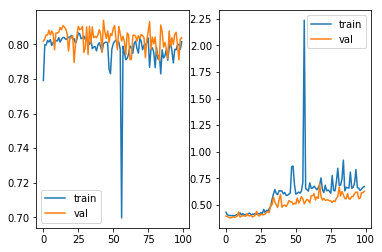

In [4]:
# Trial 2
cd=os.getcwd()
# HyperParameters:
#Batch_size=1
#4 Hidden Layers with (264,128,64,32) neurons
#Dropout_Rate: 0.1 applied in three layers
#Learning_rate: 0.001

import tensorflow as tf
from keras.callbacks import ModelCheckpoint
filepath=cd
checkpoint = ModelCheckpoint("weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# Fit the model

import keras
import tensorflow as tf
model=tf.keras.models.Sequential([ 
                                   tf.keras.layers.Dense(63,input_shape=(63,),activation='relu'),
    tf.keras.layers.Dense(264,activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.1),
   tf.keras.layers.Dense(32,activation='relu'),
                                  
                             
                             tf.keras.layers.Dense(2,activation='softmax')
])
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
y_train_=to_categorical(y_train)
# lets train the best model for 100 epochs

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
history=model.fit(X_train,y_train_,epochs=100,validation_split=0.1,callbacks=callbacks_list,batch_size=1)

import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','val'])
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','val'])


Train on 23208 samples, validate on 2579 samples
Epoch 1/100
22912/23208 [============================>.] - ETA: 0s - loss: 0.4374 - accuracy: 0.7649
Epoch 00001: val_accuracy improved from -inf to 0.78907, saving model to weights-improvement-01-0.79.hdf5
23208/23208 [==============================] - 4s 166us/sample - loss: 0.4372 - accuracy: 0.7652 - val_loss: 0.3942 - val_accuracy: 0.7891
Epoch 2/100
23040/23208 [============================>.] - ETA: 0s - loss: 0.4061 - accuracy: 0.7899
Epoch 00002: val_accuracy improved from 0.78907 to 0.80070, saving model to weights-improvement-02-0.80.hdf5
23208/23208 [==============================] - 3s 136us/sample - loss: 0.4061 - accuracy: 0.7897 - val_loss: 0.3807 - val_accuracy: 0.8007
Epoch 3/100
22592/23208 [============================>.] - ETA: 0s - loss: 0.3894 - accuracy: 0.7963
Epoch 00003: val_accuracy improved from 0.80070 to 0.80496, saving model to weights-improvement-03-0.80.hdf5
23208/23208 [==============================] -

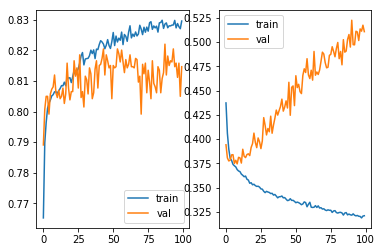

In [5]:
# Trial 3
cd=os.getcwd()
# HyperParameters:
#Batch_size=64
#4 Hidden Layers with (264,128,64,32) neurons
#Dropout_Rate: 0.1 applied in three layers
#Learning_rate: 0.001

import tensorflow as tf
from keras.callbacks import ModelCheckpoint
filepath=cd
checkpoint = ModelCheckpoint("weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# Fit the model

import keras
import tensorflow as tf
model=tf.keras.models.Sequential([ 
                                   tf.keras.layers.Dense(63,input_shape=(63,),activation='relu'),
    tf.keras.layers.Dense(264,activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.1),
   tf.keras.layers.Dense(32,activation='relu'),
                                  
                             
                             tf.keras.layers.Dense(2,activation='softmax')
])
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
y_train_=to_categorical(y_train)
# lets train the best model for 100 epochs

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
history=model.fit(X_train,y_train_,epochs=100,validation_split=0.1,callbacks=callbacks_list,batch_size=64)

import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','val'])
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','val'])
